In [0]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc1)


In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

In [0]:
mnist_data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist_data .load_data()


In [0]:
training_images, test_images = training_images/255.0, test_images/255.0

In [0]:
print(training_images.shape)

(60000, 28, 28)


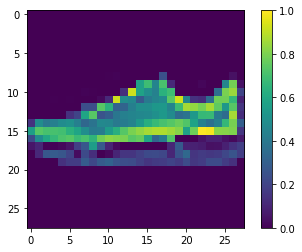

In [0]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

0: T-shirt\top 

1: Trouser

2: Pullover 

3: Dress 

4: Coat 

5: Sandal 

6: Shirt 

7: Sneaker 

8: Bag 

9: Ankle boot 

In [0]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [0]:
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [0]:
training_images[0].shape

(28, 28, 1)

In [0]:
input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)
#conv3 = Conv2D(128, (3,3), strides = 2, activation= 'relu')(conv2)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)

In [0]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])


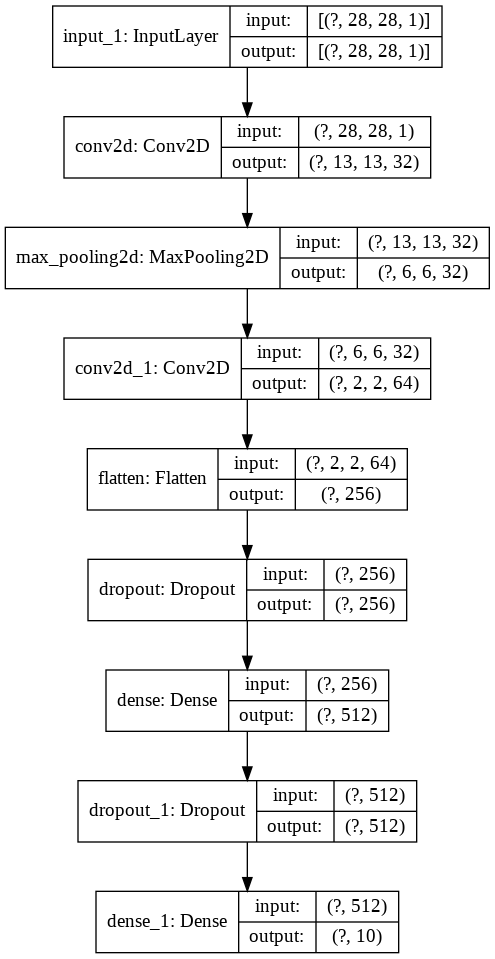

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [0]:
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5819 - accuracy: 0.7875 - val_loss: 0.4506 - val_accuracy: 0.8272
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4188 - accuracy: 0.8456 - val_loss: 0.3923 - val_accuracy: 0.8542
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8585 - val_loss: 0.3900 - val_accuracy: 0.8529
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3522 - accuracy: 0.8681 - val_loss: 0.3724 - val_accuracy: 0.8629
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3325 - accuracy: 0.8773 - val_loss: 0.3465 - val_accuracy: 0.8721
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3201 - accuracy: 0.8807 - val_loss: 0.3423 - val_accuracy: 0.8778
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3059 - accuracy: 0.8844 - val_loss: 0.3258 - val_accuracy:

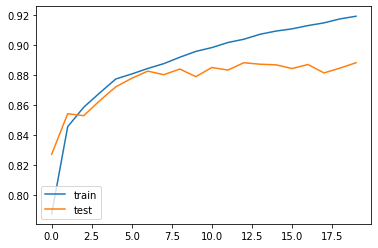

In [0]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')

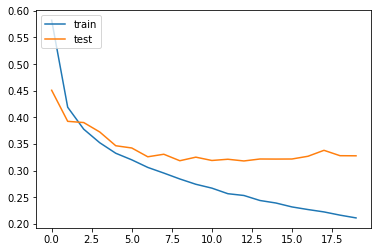

In [0]:

plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

In [0]:
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)

7


## Exercise 5.1 

### Question 1

What should be the input shape of the input image to the  convolutional neural network?

1.  Width, Height \
2. Height, Width \
3. Channels, Width, Height \
4. Width, Height, Channels \

Answer: 4

### Question 2

The pooling layer is used to pick correct features even if:

1. Image is Invereted \
2. Image is distorted \
3. Image is compressed \
4. All of the above \

Answer: 4


### Question 3

The relu activation function is used to introduce:

1. Linearity \
2. Non-linearity \
3. Quadraticity \
4. None of the above

Answer: 2




## Exercise 5.2

Using the CFAR 10 image dataset, perform image classification to recognize

In [0]:
cifar_dataset = tf.keras.datasets.cifar10

### Solution

In [0]:
(training_images, training_labels), (test_images, test_labels) = cifar_dataset.load_data()


In [0]:
training_images, test_images = training_images/255.0, test_images/255.0

training_labels, test_labels = training_labels.flatten(), test_labels.flatten()
print(training_labels.shape)
print(training_images.shape)

(50000,)
(50000, 32, 32, 3)


In [0]:
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [0]:
input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)
#conv3 = Conv2D(128, (3,3), strides = 2, activation= 'relu')(conv2)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)

In [0]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5639 - accuracy: 0.4323 - val_loss: 1.3733 - val_accuracy: 0.5095
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2854 - accuracy: 0.5433 - val_loss: 1.1476 - val_accuracy: 0.5905
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1595 - accuracy: 0.5869 - val_loss: 1.0499 - val_accuracy: 0.6373
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0665 - accuracy: 0.6250 - val_loss: 0.9789 - val_accuracy: 0.6572
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9920 - accuracy: 0.6516 - val_loss: 1.0040 - val_accuracy: 0.6478
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9311 - accuracy: 0.6730 - val_loss: 0.9331 - val_accuracy: 0.6714
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8705 - accuracy: 0.6932 - val_loss: 0.9139 - val_accuracy: